# Apache Spark 설치 - 빅데이터 병렬/분산 처리 시스템
# Python 패키지 설치 -findspark

In [ ]:
m,n = 4,5
if not (m == 0 or n == 0):
      print(m,n)


4 5


In [6]:
for i in range(10):
  print(i)

0
1
2
3
4
5
6
7
8
9


In [1]:
from google.colab import drive
drive.mount('/content/drive')

!wget -q https://dlcdn.apache.org/spark/spark-3.3.1/spark-3.3.1-bin-hadoop3.tgz
!tar xf spark-3.3.1-bin-hadoop3.tgz
!pip install -q findspark

Mounted at /content/drive
tar: spark-3.3.1-bin-hadoop3.tgz: Cannot open: No such file or directory
tar: Error is not recoverable: exiting now


# PysSpark 샘플 프로그램 작성

In [2]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.1-bin-hadoop3"

import findspark
findspark.init()

Exception: ignored

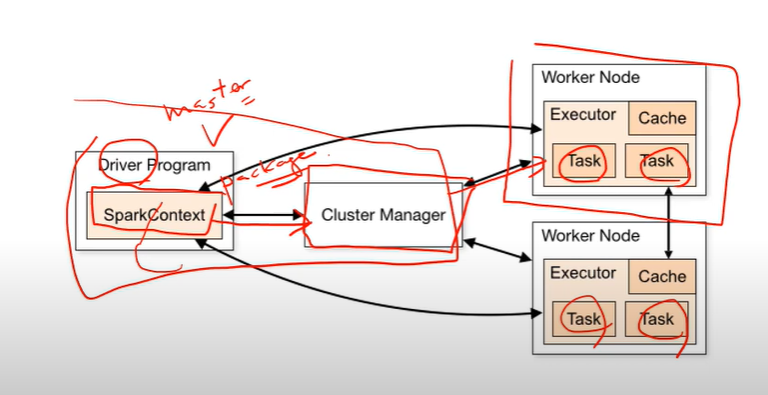

SparkContext 패키지:
- spark cluster에 접근하기 위한 통로 역할 
- 각 종 설정 세팅을 위한 API 제공
- RDD 작성 및 조작되는 API 제공

SparkSession 패키지:
- 다양한 Context(SQLContext, HiveContext(),etc)-> 표준 API 필요 -> API를 제공하는 패키지 

SparkContext 패키지랑 기능이 같음

- spark cluster에 접근하기 위한 통로 역할
- 각 종 설정 세팅을 위한 API 제공
- RDD 작성 및 조작되는 API 제공


In [3]:
# Spark 세션 열기
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local")\
        .appName("my_first_pyspark")\
        .config('spark.ui.port','4050')\
        .getOrCreate()

ModuleNotFoundError: ignored

In [ ]:
# Spark Context 만들기 
from pyspark import SparkContext
sc = SparkContext("local","first app")

In [ ]:
# SparkContext 사용
import pyspark
sc = pyspark.SparkContext


## RDD 생성방법 

[1] collection에 대해 sparkContext.parallelize() 함수 사용

data = sc.parallelize([('amvver',22),('adsf',25),....])

[2]외부에 저장된 파일 읽어오기

data_from_file = sc.textFile("fsdfa.txt.gz",4)





### Pi 추정하기 

In [ ]:
import random

num_samples = 10000

def inside(p):
  x,y = random.random(), random.random()
  return x*x + y*y <1

In [ ]:
# Spark 세션 열기
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local")\
        .appName("my_first_pyspark")\
        .config('spark.ui.port','4050')\
        .getOrCreate()

import pyspark
sc = spark.sparkContext 

#parallelize() : RDD 생성
count = sc.parallelize(range(0,num_samples)) \
        .filter(inside).count()

#print(count)
print("Pi is roughly %f" % (4.0 * count / num_samples))

spark.stop()

In [ ]:
from pyspark import SparkContext
sc = SparkContext("local","first app")
# worker를 늘리고 싶다면 
#sc = SparkContext("local[10]","first app") 
#worker를많이설정한다고좋은건아님.코어갯수의2배이하로설정하는게좋음

# Transformation 
count = sc.parallelize(range(0,num_samples)) \
        .filter(inside).count() 
        #filter transformation 은 RDD에 있는 각각의 DATA에 대해서 
        #lambda function을 적용시켜 조건이 참일 경우에만 남겨둠


#print(count)
print("Pi is roughly %f" % (4.0 * count / num_samples))

sc.stop()

transformations는 각각의 worker들이 독립적으로 하는 것들


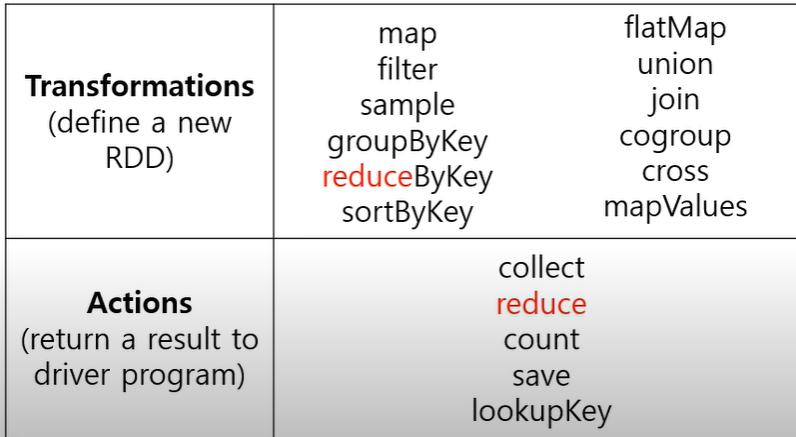

## Spark의 병렬 처리 example

In [ ]:
# file내용으로 RDD를 생성하고 변형하여 count() 액션을 수행하는 모습- file 데이터 안에 list에 몇개의 error가 포함되어있는지 
sc= SparkContext("local","myJob")

file = sc.textFile("/...")
errors =file.filter(lambda x: "ERROR" in x)
errors.count()

In [ ]:
# Logistic Regression Code 
'''
data = spark.textFile(...).map(readPoint).cache()

w=random(D)

for _ in range(ITERATIONS):
  gradients = data.map(
      lambda x,y:(y-1/(1+exp(~~~~)))*x  
  ).reduceByKey(lambda a, b:a+b)
  w +=gradient

print("Final w: {}".format(w))
'''

# 9/15 ACTION

In [ ]:
# reduce(func) 예제 코드
!wget -q https://dlcdn.apache.org/spark/spark-3.3.1/spark-3.3.1-bin-hadoop3.tgz
!tar xf spark-3.3.1-bin-hadoop3.tgz
!pip install -q findspark

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.1-bin-hadoop3"

import findspark
findspark.init()

from pyspark import SparkContext
sc = SparkContext("local","first app")


In [ ]:
data = sc.parallelize([1,2,3,4,5],2)  # 두번째 인자는 partition의 갯수

In [ ]:
data_reduce = data.reduce(lambda x,y:x+y)
print(data_reduce)

In [ ]:
# collect()함수 예제 코드 - 걍 모아주는거 
data_collect = data.collect()
print(data_collect)

In [ ]:
# count() 함수
data.count()

5

In [ ]:
#first()

data.first()

1

In [ ]:
# take(n) # 처음 n개

data.take(3)

[1, 2, 3]

In [ ]:
#takeSample() - rdd에서 랜덤한 샘플을 뽑아 드라이버로 반한
data.takeSample(False,3) # (한 번 뽑은 element를 다시 뽑을지 말지, sample의 크기,seed= None) 
# seed : 랜덤하게 smapling할 때 사용할 임의의 seed 값



[4, 2, 1]

In [ ]:
#takeOrdered() - rdd에서 작은 순서대로 지정한 개수를 리턴
# 단 작은 데이터를 다룰 때만 빠름. 큰 데이터에서는 sort()를 사용하는  것이 권장됨
data = sc.parallelize([10,2,3,4,5],2)  # 두번째 인자는 partition의 갯수
data.take(3)


[10, 2, 3]

In [ ]:
data.takeOrdered(3)

[2, 3, 4]

In [ ]:
#.saveAsTextFile(path) 함수 
data.saveAsTextFile("dddsaf")

In [ ]:
data_reread = sc.textFile("dddsaf")
data_reread.collect()

['10', '2', '3', '4', '5']

In [ ]:
!ls dsaf

part-00000  part-00001	_SUCCESS


In [ ]:
#countByKey() - key-value 쌍으로 이루어진 RDD에서 작동하며 key를 기준으로 개수를 센다
# 각 key의 count를 갖는 dictionary를 리턴

data= sc.parallelize([('a',1),('b',2),('c',3),('d',4),('a','dsfads')])
data.countByKey()



defaultdict(int, {'a': 2, 'b': 1, 'c': 1, 'd': 1})

# 9/15 TRANSFORMATION

In [ ]:
#map -rdd의 각 엘리먼트에 함수 func을 적용하여 새로운 rdd를 리턴한다. 
data = sc.parallelize([1,2,3,4,5],2)  # 두번째 인자는 partition의 갯수
data=data.map(lambda x:x+1)

data.collect()

[2, 3, 4, 5, 6]

In [ ]:
#filter
filtered = data.filter(lambda x:x<4)
filtered.collect()

[2, 3]

In [ ]:
#flatmap - map과 비슷하나 엘리먼트 하나를 받아 복수개를 출력할 수 있음
data.map(lambda x:[x,x*x]).collect()

[[2, 4], [3, 9], [4, 16], [5, 25], [6, 36]]

In [ ]:
data.flatMap(lambda x:[x,x*x]).collect()

[2, 4, 3, 9, 4, 16, 5, 25, 6, 36]

In [ ]:
#mapPartitions(func) - RDD의 각 파티션에 대해 map을 실행
data = sc.parallelize([1,2,3,4,5,6,7,8],3)

print(data.glom().collect()) # partition 어떻게 되는지 보여줌 
def f(x):
  yield sum(x)

print(data.mapPartitions(f).collect())


[[1, 2], [3, 4], [5, 6, 7, 8]]
[3, 7, 26]


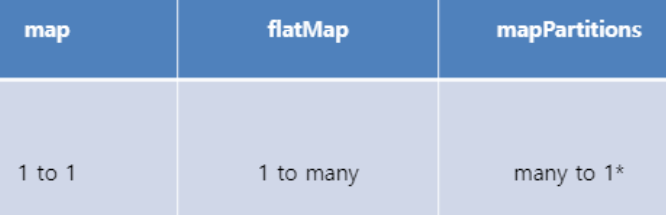

In [ ]:
#mapValues(func) - key-value 쌍 RDD에 대해 값에 대해서만 func를 적용 

data =sc.parallelize([('a',['apple','banana','lemon']),('b',['grapes'])])

def f(x): return len(x)
data.mapValues(f).collect()


[('a', 3), ('b', 1)]

In [ ]:
#reduceByKey(func,[numPartitions])
# key별로 func을 수행, 결과로 생성되는 rdd의 파티션 개수

data= sc.parallelize([('a',1),('b',2),('c',3),('a',4)])
data.reduceByKey(lambda x,y: x+y ).collect()

[('a', 5), ('b', 2), ('c', 3)]

### word count 동작 코딩

In [ ]:
#Word Count의 동작

data= sc.parallelize(['Spark is fast is a abb abc'])
print(data.collect())

data= data.flatMap(lambda line:(line.split(' ')))
print(data.collect())

data = data.filter(lambda word:len(word)>1) # 길이가 2보다 긴 단어들만 
print(data.collect())

data = data.map(lambda word:(word[:2],1)) #같은 단어를 묶어서 count하기 위해 (key,value) 형태로 바꾼다 #단 앞의 두글자 빈도를 세기위해서 [:2]
print(data.collect())

data=data.reduceByKey(lambda a,b:a+b) #key 값을 기준으로 value를 모두 더해준다. 
print(data.collect())

data = data.values()
print(data.collect())

data=data.filter(lambda x:x>1) 
print(data.collect())

print(data.sum())
#print(sum(data.collect()))

['Spark is fast is a abb abc']
['Spark', 'is', 'fast', 'is', 'a', 'abb', 'abc']
['Spark', 'is', 'fast', 'is', 'abb', 'abc']
[('Sp', 1), ('is', 1), ('fa', 1), ('is', 1), ('ab', 1), ('ab', 1)]
[('Sp', 1), ('is', 2), ('fa', 1), ('ab', 2)]
[1, 2, 1, 2]
[2, 2]
4


In [ ]:
data.values().collect()

[0, 2, 0, 2]

# 9/22 

In [ ]:

# groupByKey([numPartitions]) - (key,value) 쌍의 RDD에서 key가 같은 쌍만 모아(key,Iterable<value>) 쌍의 RDD를 반환
# numPartitions(optional): 반환하는 새 RDD가 나우어질 파티션 개수

data= sc.parallelize([('a',1),('b',2),('c',3),('a',4)])

data.groupByKey().mapValues(list).collect()

[('a', [1, 4]), ('b', [2]), ('c', [3])]

In [ ]:
data.groupByKey(2).mapValues(list).collect()

[('b', [2]), ('c', [3]), ('a', [1, 4])]

In [ ]:
#reduceByKey
data.reduceByKey(lambda x,y: [x,y]).collect()

[('a', [1, 4]), ('b', 2), ('c', 3)]

## GroupByKey vs ReduceByKey


In [ ]:
words = ["one","two","two","three","three","three"]

word_pair_rdd = sc.parallelize(words).map(lambda x:(x,1))
print(word_pair_rdd.collect())

word_count_with_reduce = word_pair_rdd.reduceByKey(lambda a,b:a+b)
print(word_count_with_reduce.collect())

word_count_with_group = word_pair_rdd.groupByKey().map(lambda x:(x[0],sum(x[1])))
print(word_count_with_group.collect())


[('one', 1), ('two', 1), ('two', 1), ('three', 1), ('three', 1), ('three', 1)]
[('one', 1), ('two', 2), ('three', 3)]
[('one', 1), ('two', 2), ('three', 3)]


In [ ]:
#sortByKey([ascending],[numPartitions])
# 키 값을 기준으로 오름차순 혹은 내림차순으로 정렬한 결과 rdd를 리턴

data= sc.parallelize([(3,'a'),(4,'b'),(1,'c'),(2,'d')])

data.sortByKey().collect()



[(1, 'c'), (2, 'd'), (3, 'a'), (4, 'b')]

In [ ]:
data.sortByKey(False).collect()


[(4, 'b'), (3, 'a'), (2, 'd'), (1, 'c')]

In [ ]:
#coalesce(numPartitions,shuffle= False) - 파티션 갯수 줄인 rdd 생성 
# shuffling이 일어나지 않음.
data =sc.parallelize([1,2,3,4,5],3)
data.glom().collect()

[[1], [2, 3], [4, 5]]

In [ ]:
data.coalesce(2).glom().collect()

[[1], [2, 3, 4, 5]]

In [ ]:
#repartition(num) - 파티션 갯수 n개로 무작위로 재구성 
# shuffling이 일어남.
data =sc.parallelize([1,2,3,4,5],4)
data.glom().collect()


[[1], [2], [3], [4, 5]]

In [ ]:
data.repartition(2).glom().collect()

[[1, 3, 4, 5], [2]]

In [ ]:
#sample(withReplacement,fraction,seed)
# 데이터의 일부를 샘플링 -(중복추출 여부, 리턴할 데이터셋과 전체 데이터셋 간의 크기 비율, seed값)

data = sc.parallelize([1,2,3,4,5,6,7,8,9,10],3)
sample = data.sample(False, 0.5,777).collect()
sample

[2, 3, 4, 5, 9]

In [ ]:
#distinct([nummPartitions])
# 중복 제거
data = sc.parallelize([1,2,3,4,5,6,6666,66,6,6,6,6,2,3,4,5,6,7,8,9,10],3)

print(data.distinct().collect())

[3, 6, 6666, 66, 9, 1, 4, 7, 10, 2, 5, 8]


In [ ]:
ddd = data.distinct()
print(ddd.collect())


[3, 6, 6666, 66, 9, 1, 4, 7, 10, 2, 5, 8]


In [ ]:
ddd.takeOrdered(12)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 66, 6666]

# Broadcast

Access to variables defined in the driver
- driver variables   vs   broadcast objects

- driver variables

In [ ]:
import random


random.randrange(10)

2

In [ ]:
import random

v = [random.randrange(10) for _ in range(100000)]

sc.parallelize(reversed(range(100000))).map(lambda x:v[x]).sum()

- broadcast objects

In [ ]:
# Broadcast

# read-only variable to the cluster, returning a Broadcast object for reading it in distributed functions
# the variable will be sent to each cluster only once


b= sc.broadcast([1,2,3,4,5])
b.value

[1, 2, 3, 4, 5]

In [ ]:
sc.parallelize([0,0]).flatMap(lambda x: b.value).collect()

[1, 2, 3, 4, 5, 1, 2, 3, 4, 5]

In [ ]:
#v = [random.randrange(10) for _ in range(100000)]

bc_v = sc.broadcast(v)
sc.parallelize(reversed(range(100000))).map(lambda x:bc_v.value[x]).sum()

449713

In [ ]:
def dist(a,b):
  xxx = ((a[0]-b[0])**2 + (a[1]-b[1])**2)**0.5
  return xxx

In [ ]:
# compute sum of distane of a given set of point pairs 
# given - a list of data points(point ID,x,y, coordinates)

# local_id_pairs = list of (point id1,point id2)
# local_ point_set = list of (point id, x,y)

local_point_set = [(0,(1,1)),(1,(2,2)),(2,(3,3)),(3,(4,4)),(4,(5,5))]
local_id_pairs =[(0,1),(1,2),(2,3),(3,4)] # 0번과 1번과의 거리, 1번과 2번과의 거리 ....

rdd_id_pairs = sc.parallelize(local_id_pairs)
print(rdd_id_pairs.collect())
'''방법1'''
rdd_id_pairs.map(lambda t: dist(local_point_set[t[0]][1],local_point_set[t[1]][1])).sum() 

[(0, 1), (1, 2), (2, 3), (3, 4)]


5.656854249492381

In [ ]:
'''방법2'''
bc_points =sc.broadcast(local_point_set)


rdd_id_pairs.map(lambda t: dist(bc_points.value[t[0]][1],bc_points.value[t[1]][1])).sum() 

5.656854249492381

In [ ]:
# accumulate

num =sc.accumulator(10)
def f(x):
  global num
  num+=x
  return x

rdd =sc.parallelize([20,30,40,50,])
res = rdd.map(f).sum()
final =num.value

final

150

#9/29 

In [ ]:
!wget -q https://dlcdn.apache.org/spark/spark-3.3.0/spark-3.3.0-bin-hadoop3.tgz
!tar xf spark-3.3.0-bin-hadoop3.tgz
!pip install -q findspark

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.0-bin-hadoop3"

import findspark
findspark.init()

from pyspark import SparkContext
sc = SparkContext("local","first app")

In [ ]:
# union - 두 rdd의 element들을 모두 합쳐 새로운 rdd생성

data1 = sc.parallelize([1,2,3,4,5],1)
data2 = sc.parallelize([6,7,8,9,10],1)

print(data1.union(data2).collect())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [ ]:
#intersection - 두 rdd의 교집합 


data1 = sc.parallelize([1,2,3,4,5],1)
data2 = sc.parallelize([3,4,5,9,10],1)

print(data1.intersection(data2).collect())

[4, 3, 5]


In [ ]:
#cogroup : 키-값 쌍 유형의 rdd에서 사용

'''
(k,v) rdd와 (k,w) rdd에서 호출 되면 
(k,(iterable<v>, iterable<w>))
'''
data1= sc.parallelize([(1,'a'),(2,'b'),(3,'c'),(4,'d')])
data2= sc.parallelize([(2,'e'),(2,'f'),(3,'g'),(4,'h')])

group1 = data1.cogroup(data2).collect()

group1

[(2,
  (<pyspark.resultiterable.ResultIterable at 0x7fd98ac27710>,
   <pyspark.resultiterable.ResultIterable at 0x7fd98a261d90>)),
 (4,
  (<pyspark.resultiterable.ResultIterable at 0x7fd98a261bd0>,
   <pyspark.resultiterable.ResultIterable at 0x7fd98a261750>)),
 (1,
  (<pyspark.resultiterable.ResultIterable at 0x7fd98a16d150>,
   <pyspark.resultiterable.ResultIterable at 0x7fd98a16dc10>)),
 (3,
  (<pyspark.resultiterable.ResultIterable at 0x7fd98a16d350>,
   <pyspark.resultiterable.ResultIterable at 0x7fd98a16d090>))]

In [ ]:
group2 = data1.cogroup(data2).mapValues(lambda t: (list(t[0]), list(t[1]))).collect()
group2

[(2, (['b'], ['e', 'f'])),
 (4, (['d'], ['h'])),
 (1, (['a'], [])),
 (3, (['c'], ['g']))]

In [ ]:
'''
how to set a partitioner
partitionBy(numPartitions, partitionFunc) - (파티션 개수, key를 받아 파티션 번호를 생성하기 위한 정수값을 생성하는 함수)

'''

pairs= sc.parallelize([1,2,3,4,2,4,1]).map(lambda x :(x,x))
pairs.collect()


[(1, 1), (2, 2), (3, 3), (4, 4), (2, 2), (4, 4), (1, 1)]

In [ ]:
sets = pairs.partitionBy(2).glom().collect()
sets

[[(2, 2), (4, 4), (2, 2), (4, 4)], [(1, 1), (3, 3), (1, 1)]]

In [ ]:
len(set(sets[0]).intersection(set(sets[1])))

0

In [ ]:
#join(other,numPartitions =None)

x= sc.parallelize([('a',1),('b',2),('a',32)])
y= sc.parallelize([('a',2),('a',3)])
sorted(x.join(y).collect())


[('a', (1, 2)), ('a', (1, 3)), ('a', (32, 2)), ('a', (32, 3))]

In [ ]:
x= sc.parallelize([('a',1),('b',2),('a',32)])
y= sc.parallelize([('a',2),('a',3)])

x.join(y).collect()

[('a', (1, 2)), ('a', (1, 3)), ('a', (32, 2)), ('a', (32, 3))]